# Final Project

### Problem Statement
Develop an unsupervised learning model to segment customers of a mall based on their demographic and behavioral data, including age, gender, annual income, and spending score. This segmentation will enable the identification of distinct customer groups with similar characteristics, facilitating targeted marketing strategies and personalized customer engagement.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors


df=pd.read_csv('Mall_Customers.csv')

## EDA  

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape

(200, 5)

In [5]:
df.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

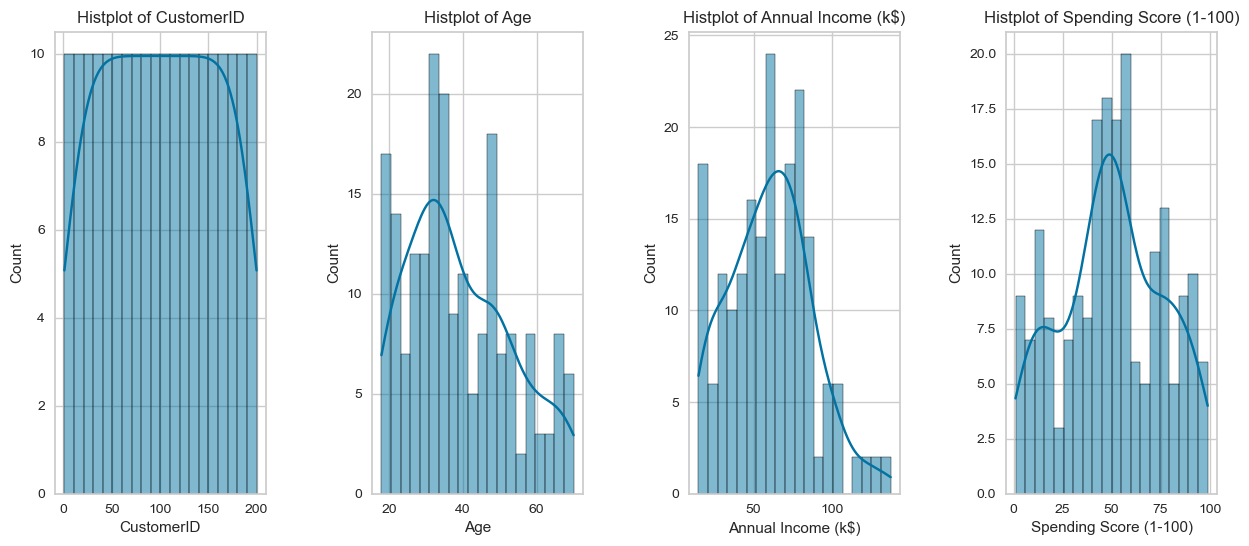

In [7]:
plt.figure(1,figsize=(15,6))
n=0
for x in colnames_numerics_only:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)
    plt.title('Histplot of {}'.format(x))
plt.show()

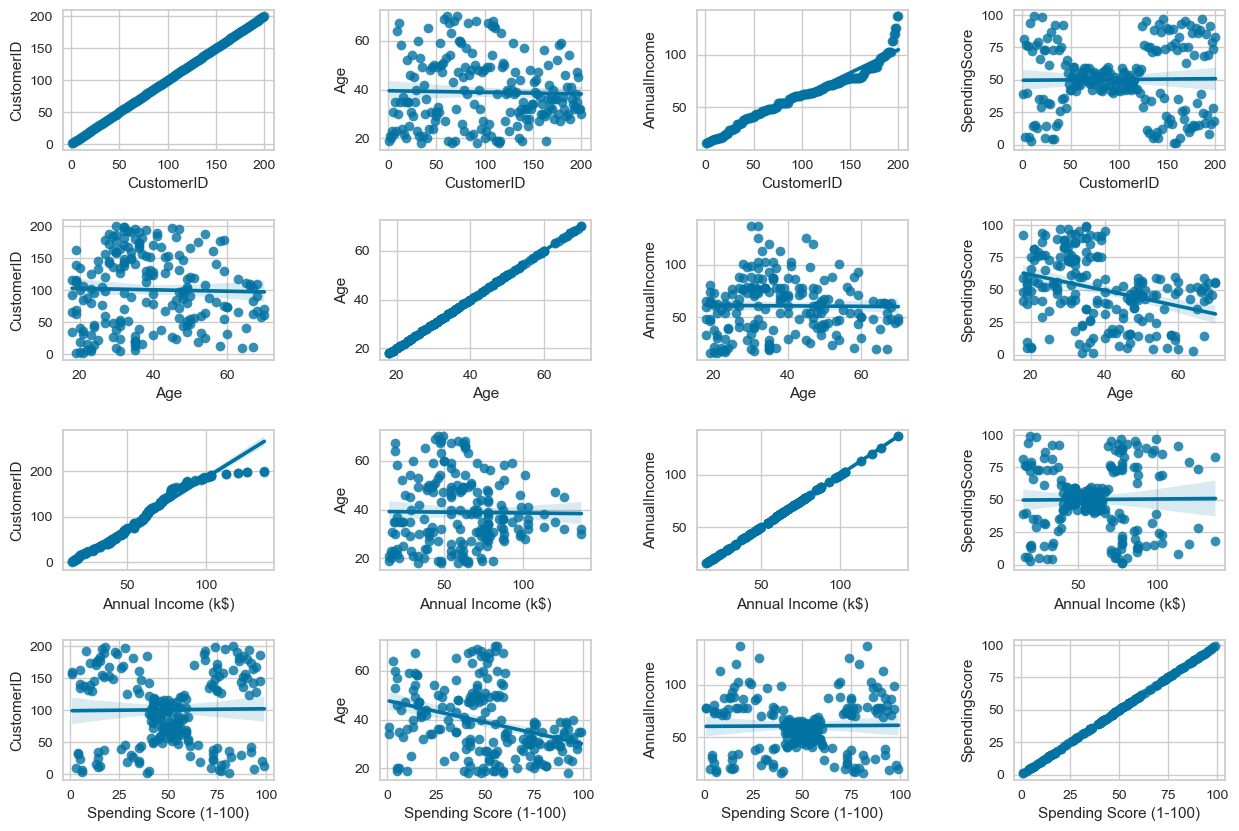

In [8]:
plt.figure(1,figsize=(15,10))
n=0
for x in colnames_numerics_only:
    for y in colnames_numerics_only:
        n+=1
        plt.subplot(4,4,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

<Axes: >

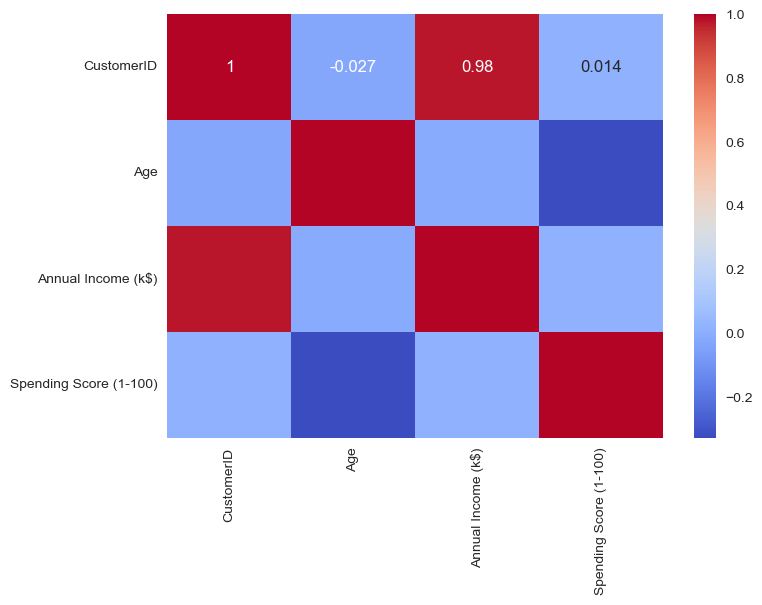

In [9]:
corr = df[colnames_numerics_only].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

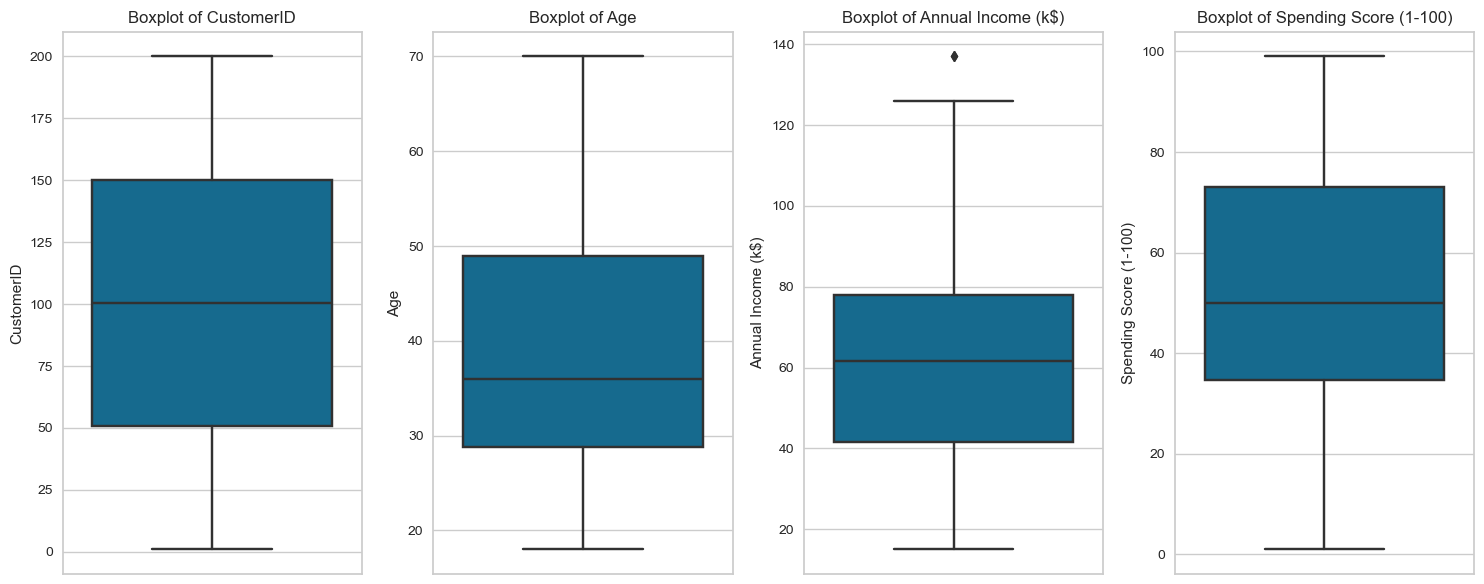

In [10]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(colnames_numerics_only):
    plt.subplot(1, len(colnames_numerics_only), i + 1)
    sns.boxplot(y=df[col])
    plt.title('Boxplot of {}'.format(col))
plt.tight_layout()
plt.show()


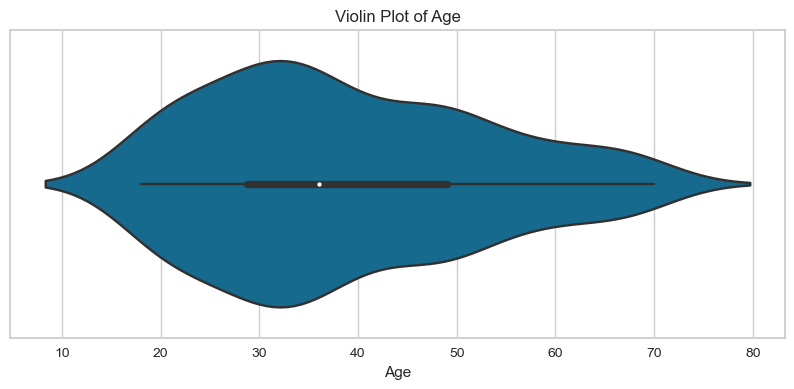

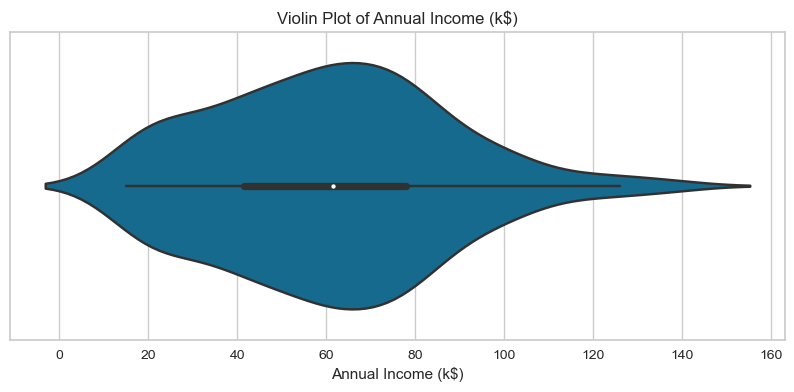

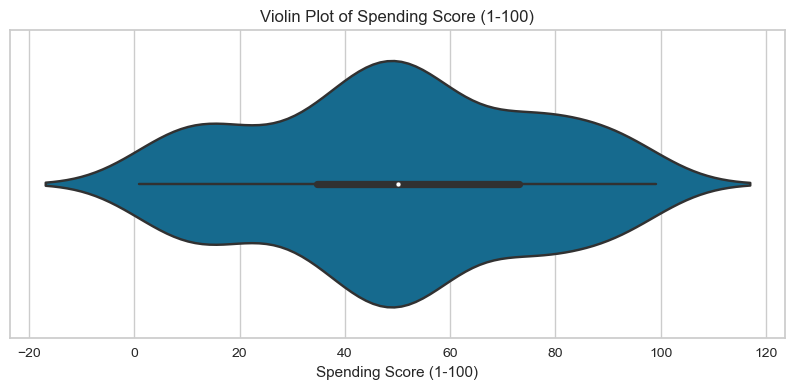

In [11]:
# Violin plots for numerical features to view distributions and potential outliers

for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(10, 4))
    sns.violinplot(x=df[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.show()


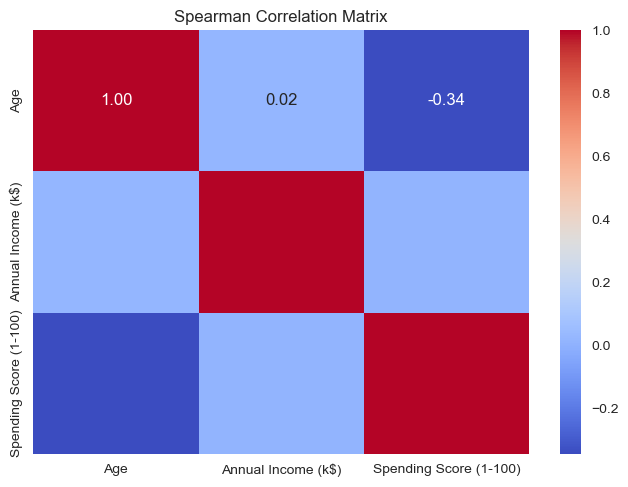

In [12]:
# Spearman's correlation for non-parametric data
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


Skewness before transformation:
Annual Income (k$)    0.321843
Age                   0.485569
dtype: float64
Skewness after log transformation:
-0.7359971613306433


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


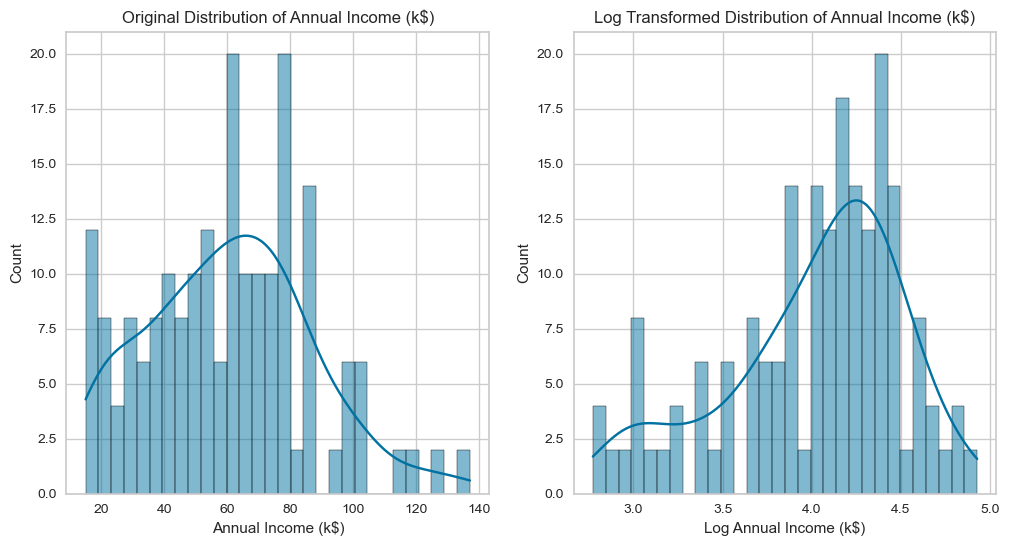

In [13]:
# Show skewness
print("Skewness before transformation:")
print(df[['Annual Income (k$)', 'Age']].skew())

# Applying log transformation to 'Annual Income (k$)' to reduce skewness
df['Log Annual Income (k$)'] = np.log(df['Annual Income (k$)'] + 1)

print("Skewness after log transformation:")
print(df['Log Annual Income (k$)'].skew())

# Visualize the effect of the log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True)
plt.title('Original Distribution of Annual Income (k$)')
plt.subplot(1, 2, 2)
sns.histplot(df['Log Annual Income (k$)'], bins=30, kde=True)
plt.title('Log Transformed Distribution of Annual Income (k$)')
plt.show()


Skewness before transformation:
Annual Income (k$)    0.321843
Age                   0.485569
dtype: float64
Skewness after log transformation:
-0.0894906016890439


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


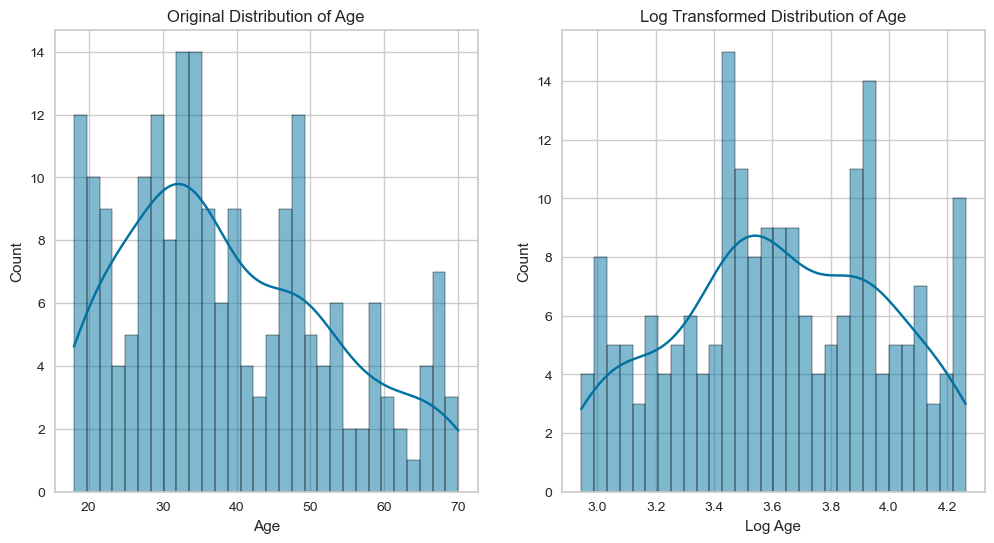

skewness =  0.48556885096681657


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


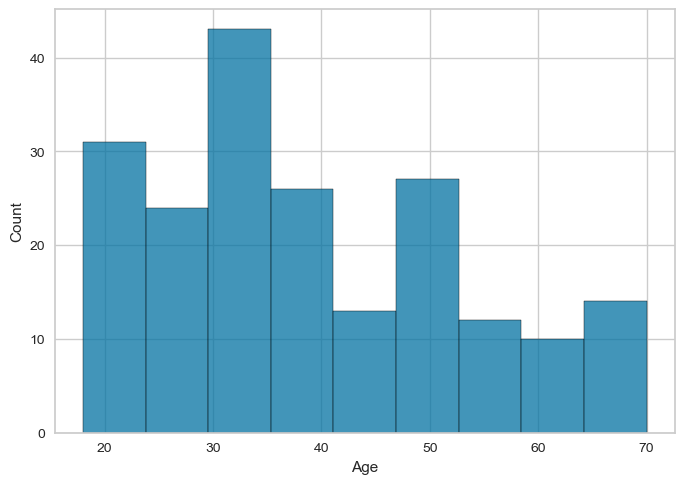

In [14]:
# Show skewness
print("Skewness before transformation:")
print(df[['Annual Income (k$)', 'Age']].skew())

# Applying log transformation to 'Annual Income (k$)' to reduce skewness
df['Log Age'] = np.log(df['Age'] + 1)

print("Skewness after log transformation:")
print(df['Log Age'].skew())

# Visualize the effect of the log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Original Distribution of Age')
plt.subplot(1, 2, 2)
sns.histplot(df['Log Age'], bins=30, kde=True)
plt.title('Log Transformed Distribution of Age')
plt.show()
print('skewness = ',df['Age'].skew())
sns.histplot(df['Age']);

##### The skewness values for the Annual Income and Age columns are positive, indicating that both distributions are right-skewed, meaning that the tail on the right side (the positive direction) is longer or fatter than the left tail.

In [15]:
# Detect outliers using IQR
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Annual Income (k$)'] < (Q1 - 1.5 * IQR)) | (df['Annual Income (k$)'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers in 'Annual Income (k$)': {len(outliers)}")
print("Options: Remove, Impute, or Cap")

df.loc[df['Annual Income (k$)'] < (Q1 - 1.5 * IQR), 'Annual Income (k$)'] = Q1 - 1.5 * IQR
df.loc[df['Annual Income (k$)'] > (Q3 + 1.5 * IQR), 'Annual Income (k$)'] = Q3 + 1.5 * IQR


Number of outliers in 'Annual Income (k$)': 2
Options: Remove, Impute, or Cap


C:\Users\johnraesly\AppData\Local\Temp\ipykernel_6608\324767148.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-13.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Annual Income (k$)'] < (Q1 - 1.5 * IQR), 'Annual Income (k$)'] = Q1 - 1.5 * IQR


In [16]:
# Hypothesizing important features
print("Preliminary hypothesis on feature importance:")
print("'Spending Score (1-100)' and 'Annual Income (k$)' are hypothesized to be the most important features for customer segmentation, as they directly relate to customer purchasing behavior and economic status.")


Preliminary hypothesis on feature importance:
'Spending Score (1-100)' and 'Annual Income (k$)' are hypothesized to be the most important features for customer segmentation, as they directly relate to customer purchasing behavior and economic status.


### Data Visualization

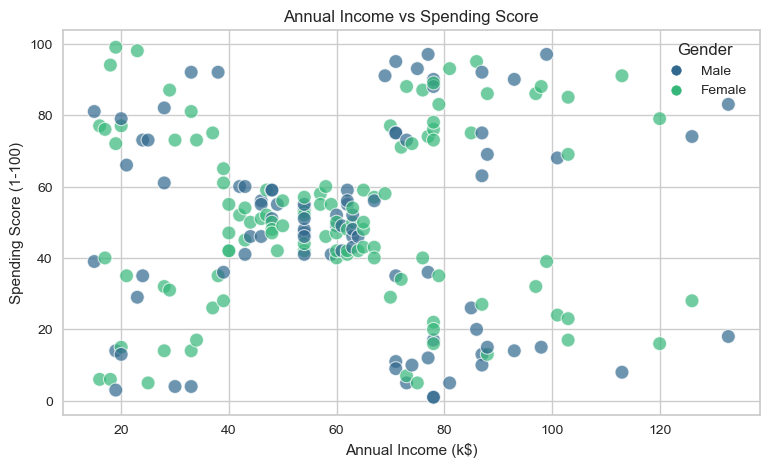

In [17]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis', s=100, alpha=0.7)
plt.title('Annual Income vs Spending Score')
plt.show()

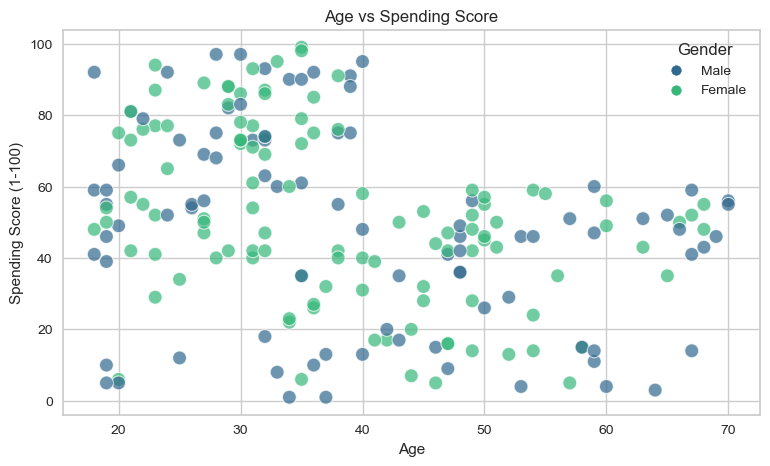

In [18]:
plt.figure(figsize=(9,5))
sns.scatterplot(df,x='Age',y='Spending Score (1-100)',hue='Gender',palette='viridis',s=100,alpha=0.7)

plt.title('Age vs Spending Score')
plt.show()

### Data Preprocessing

In [19]:
# Reporting missing values
print("Missing values per column:")
print(df.isnull().sum())

# Impute missing values with the median (demonstration for 'Annual Income (k$)')
df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].median(), inplace=True)



Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Log Annual Income (k$)    0
Log Age                   0
dtype: int64


## Model Selection and Methodology

#### Clustering


In [20]:
X1=df[['Age','Annual Income (k$)','Spending Score (1-100)']]


##### 1) K-means

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

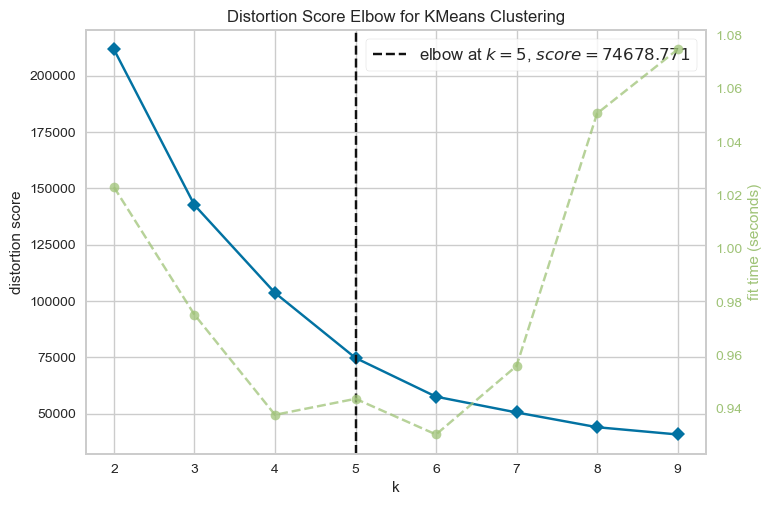

In [21]:
visualizer = KElbowVisualizer(KMeans(),k=(2,10))
visualizer.fit(X1) 
visualizer.poof()
plt.show()

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Log Annual Income (k$),Log Age
0,1,Male,19,15.0,39,2.772589,2.995732
1,2,Male,21,15.0,81,2.772589,3.091042
2,3,Female,20,16.0,6,2.833213,3.044522
3,4,Female,23,16.0,77,2.833213,3.178054
4,5,Female,31,17.0,40,2.890372,3.465736


In [25]:
df_income_score = df.iloc[:, [False, False, False, True, True, False, False]].values
scaler = MinMaxScaler()
df_income_score_scaled=scaler.fit_transform(df_income_score)
df_income_score_scaled

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00849257, 0.05102041],
       [0.00849257, 0.7755102 ],
       [0.01698514, 0.39795918],
       [0.01698514, 0.76530612],
       [0.02547771, 0.05102041],
       [0.02547771, 0.94897959],
       [0.03397028, 0.02040816],
       [0.03397028, 0.7244898 ],
       [0.03397028, 0.13265306],
       [0.03397028, 1.        ],
       [0.04246285, 0.14285714],
       [0.04246285, 0.7755102 ],
       [0.04246285, 0.12244898],
       [0.04246285, 0.79591837],
       [0.05095541, 0.34693878],
       [0.05095541, 0.66326531],
       [0.06794055, 0.28571429],
       [0.06794055, 0.98979592],
       [0.07643312, 0.34693878],
       [0.07643312, 0.73469388],
       [0.08492569, 0.04081633],
       [0.08492569, 0.73469388],
       [0.1104034 , 0.13265306],
       [0.1104034 , 0.82653061],
       [0.1104034 , 0.31632653],
       [0.1104034 , 0.6122449 ],
       [0.11889597, 0.30612245],
       [0.11889597, 0.87755102],
       [0.

In [ ]:
df_scaled = pd.DataFrame(df_income_score_scaled, columns=['Annual Income Scaled', 'Spending Score Scaled'])
print(df_scaled.head())


   Annual Income Scaled  Spending Score Scaled
0              0.000000               0.387755
1              0.000000               0.816327
2              0.008197               0.051020
3              0.008197               0.775510
4              0.016393               0.397959


Elbow method helps to select the optimal number of clusters by fitting the model with a range of values for K.If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

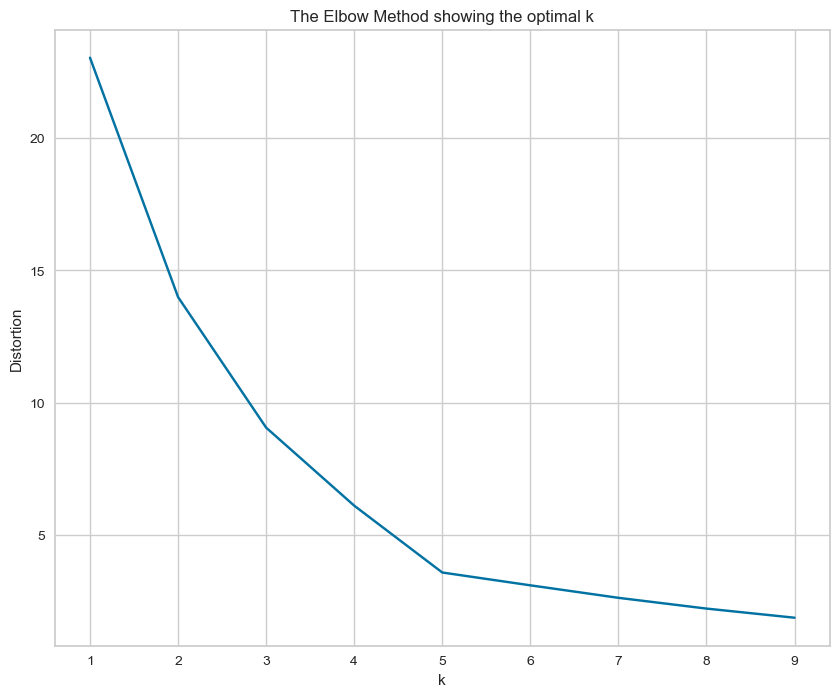

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We observe that there in decrease in Average Silhouette Score value when K=4 which is non ideal.
Elbow method shows 5 is optimal. But what about silhouette method? By the way, the Elbow Method and the Silhouette Method are not like alternatives to each other for finding the optimal amount of clusters. Rather they are instruments for using together for a more confident decision.

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). It's values aer within [-1;1]. Optimal value is a peak.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


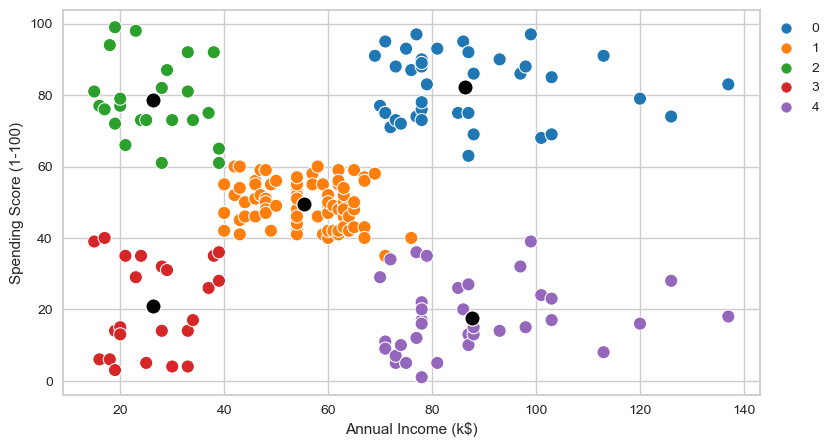

In [ ]:
k=5
K_means=KMeans(init="k-means++",n_clusters=k)
K_means.fit(X1)
df['KM_Cluster']=K_means.labels_
KM_centres=K_means.cluster_centers_
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='KM_Cluster',palette='tab10',s=90)
ax=sns.scatterplot(x=KM_centres[:,1],y=KM_centres[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

Groups could be described as:

- Green - low annual income and high spending score (careless)
- Blue - high income and high spending score (target)
- Orange - medium indome and medium spending score (standart)
- Purple - high icome and low spending rate (careful)
- Red - low income and low spending score (sensible)

##### 2. Heirarchical Clustering

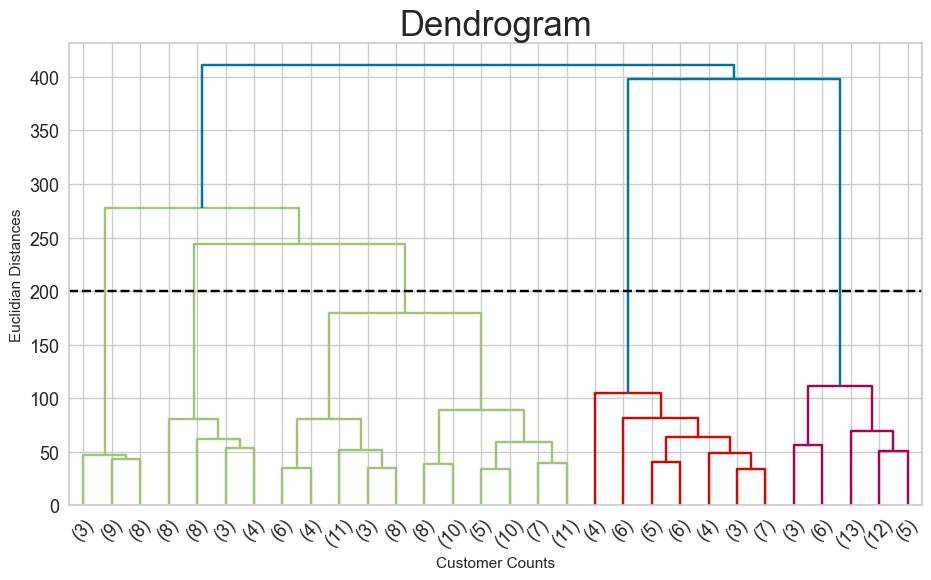

In [23]:
#creating a Dendrogram to obtain the required cluster count
plt.figure(figsize=(11, 6))
dendo = dendrogram(linkage(X1, method='ward'),leaf_font_size=5,truncate_mode = 'lastp') 
plt.axhline(y=200 , color='black',linestyle = '--')
plt.title('Dendrogram', fontsize=25) 
plt.xlabel('Customer Counts')
plt.ylabel('Euclidian Distances')
plt.yticks(fontsize=13)  
plt.xticks(fontsize=13) 
plt.show() 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


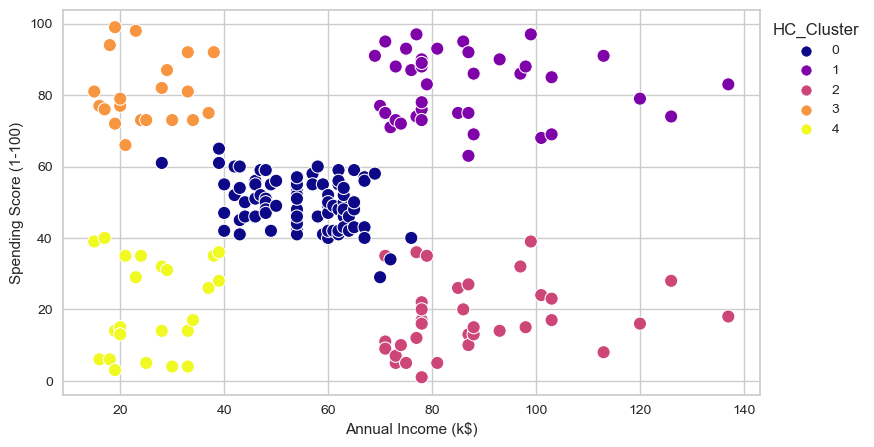

In [ ]:
agc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agc.fit(X1)
df['HC_Cluster']=agc.labels_
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='HC_Cluster',palette='plasma',s=90)
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

##### 3. DBSCAN

In [ ]:
db = DBSCAN(eps=10,min_samples=6) 
db.fit(X1) 
tlabels = db.labels_
tlabels


array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1, -1,
       -1,  2, -1,  2, -1,  2, -1, -1, -1,  2, -1,  2, -1,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

We obtain a large amount of -1 values which corresponds to Outliers. Thus we need to adjust eps and min_sample values such that we obtain more Cluster labels than Outliers.

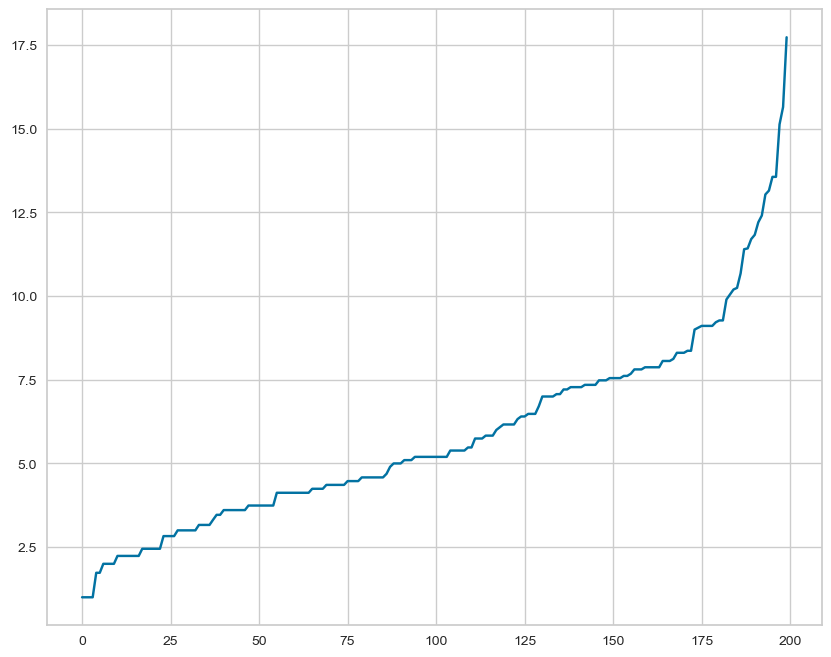

In [ ]:
ep,count = NearestNeighbors(n_neighbors=20).fit(X1).kneighbors(X1) #arbitrary n_neighbors value
ep = np.sort(ep, axis=0)
plt.figure(figsize=(10,8))
plt.plot(ep[:,1])
plt.show()

The curve gradually increases for an epsilon (eps) value of 9, covering more than 87% of our data samples. Subsequently, the curve becomes more stagnant. As a result, we will examine the epsilon (eps) value up to 13.

In [ ]:
df_income_score = df.iloc[:, [False, False, False, True, True]]
df_norm = scaler.fit_transform(df_income_score)
df_income_score

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
min_samples = range(2,10)
eps = np.arange(9,13, 0.25)
output = []
for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(eps = ep,min_samples=ms).fit(X1).labels_
        score = silhouette_score(X1, labels)
        output.append((ms, ep, score))
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")    

Best silhouette_score: 0.25544780362774955
min_samples: 4
eps: 12.5


In [ ]:
db = DBSCAN(eps=12.5,min_samples=4)
db.fit(X1) 
labels = db.labels_
df['DB_Cluster']=labels
labels

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

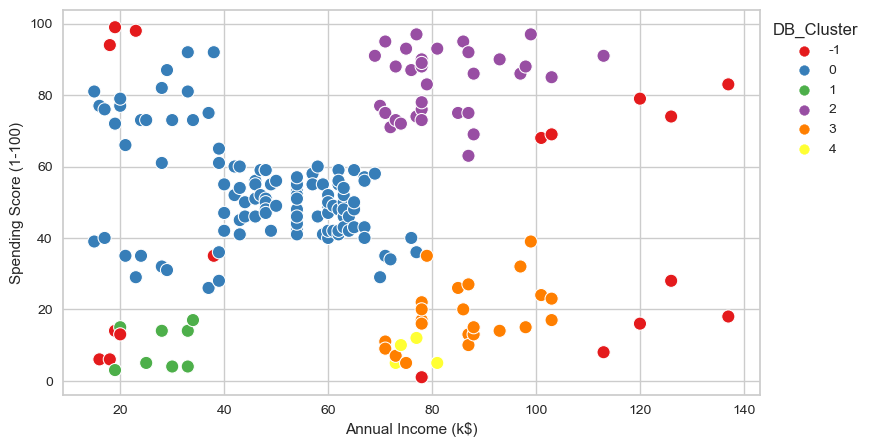

In [ ]:
plt.figure(figsize=(9,5))
ax=sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='DB_Cluster',palette='Set1',s=90)
# ax=sns.scatterplot(x=centres[:,0],y=centres[:,2],s=120,color='black')
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))
plt.show()

# red indicates the outliers

### Model Evaluation metrics

In [ ]:
silhoutte_scores=[silhouette_score(X1,K_means.labels_),silhouette_score(X1,agc.labels_),
                  silhouette_score(X1,db.labels_)]

davies_bouldin_scores=[davies_bouldin_score(X1,K_means.labels_),davies_bouldin_score(X1,agc.labels_),
                  davies_bouldin_score(X1,db.labels_)]

In [ ]:
score_df={'Algorithm':["K-means", "Heirarchical", "DBSCAN"],'Silhouette Score':silhoutte_scores,
          'Davies-Bouldin Scores':davies_bouldin_scores}
score_df=pd.DataFrame.from_dict(score_df)
score_df


,Algorithm,Silhouette Score,Davies-Bouldin Scores
0,K-means,0.445132,0.821319
1,Heirarchical,0.440997,0.821116
2,DBSCAN,0.255448,2.241463


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

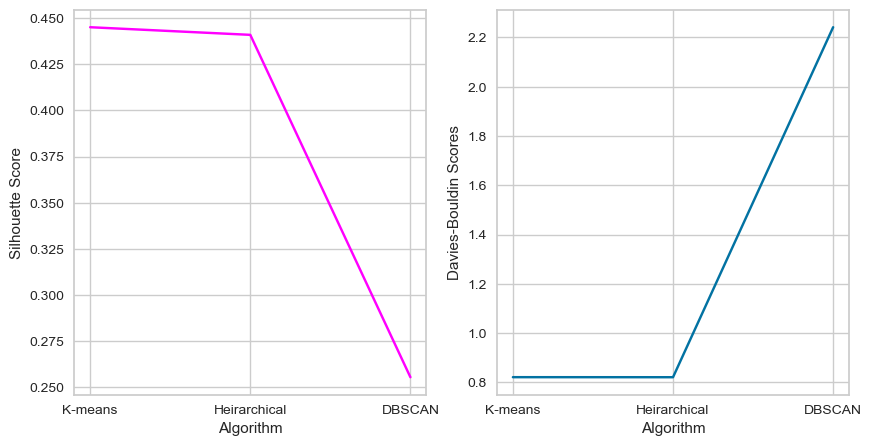

In [ ]:
fig,axes = plt.subplots(1, 2, figsize=(10,5))
sns.lineplot(data=score_df,x='Algorithm',y='Silhouette Score',color='Magenta',ax=axes[0])
sns.lineplot(data=score_df,x='Algorithm',y='Davies-Bouldin Scores',ax=axes[1])
plt.show()

## Model Evaluation and Comparison

We evaluated three different clustering algorithms: K-means, Hierarchical, and DBSCAN. To compare their performance, we utilized the Silhouette Score and the Davies-Bouldin Score, which are key metrics for assessing clustering quality.

### Results Overview

The following table displays the Silhouette and Davies-Bouldin scores for each algorithm:

| Algorithm     | Silhouette Score | Davies-Bouldin Score |
|---------------|------------------|----------------------|
| K-means       | 0.445132         | 0.821319             |
| Hierarchical  | 0.440997         | 0.821116             |
| DBSCAN        | 0.255448         | 2.241463             |

### Analysis

- **Silhouette Score**: Higher values indicate that clusters are well-separated and clearly defined. In our case, both K-means and Hierarchical clustering performed similarly and considerably better than DBSCAN, with scores around 0.44. This suggests that the clusters formed by these two methods have less overlap and more definition compared to DBSCAN.

- **Davies-Bouldin Score**: Lower values indicate that clusters are more compact and better separated, which is desirable. Here again, K-means and Hierarchical clustering show similar and superior performance compared to DBSCAN, with scores around 0.82. DBSCAN's significantly higher score of 2.24 indicates less optimal clustering.

### Conclusion

K-means and Hierarchical clustering have shown similar and promising results based on the Silhouette and Davies-Bouldin scores, suggesting these methods are effective for our data set. DBSCAN, however, underperformed in comparison, indicating it may not be suitable for this particular clustering task given the current parameter settings or the nature of our data. Further investigation into parameter tuning for DBSCAN or exploration of alternative algorithms may be required if we seek improvements or different clustering dynamics.
